In [78]:
import pandas as pd
import math


df = pd.read_csv("snapshot_fettarmqp.csv")


df = df[ (df["black"] == "FettarmQP") | (df["white"] == "FettarmQP")]

df = df[df["rated"] == 1]

sf_lines = df.stockfish 

sf_lines.to_list()



def average_cpl(line, white):
    print("enter", line)
    if not isinstance(line, str):
        return 123
    

    evals = line.split(",")
    print(evals)

    if white:
        # take all evens 
        evals = evals[::2]
        print(evals)
    else:
        evals = evals[1::2]

    evals = [x for x in evals if isinstance(x, float)]

    print(evals)





df[df.stockfish.apply(lambda x: isinstance(x, str))].iloc[:1].apply(lambda x: average_cpl(x["stockfish"],True),axis=1)
df[df.stockfish.apply(lambda x: isinstance(x, str))].iloc[:1].apply(lambda x: average_cpl(x["stockfish"],False),axis=1)

df[df.stockfish.apply(lambda x: isinstance(x, str))].iloc[:1]



enter 0.37,0.4,0.42,0.24,0.55,0.58,1.16,0.51,1.47,0.81,0.91,0.6,1.17,0.17,0.57,-3.77,-3.62,-6.15,-6.4,-6.29,-6.3,-6.16,-6.27,-8.32,-7.69,-8.39,-8.66,-9.25,-8.99,-8.76,-8.81
['0.37', '0.4', '0.42', '0.24', '0.55', '0.58', '1.16', '0.51', '1.47', '0.81', '0.91', '0.6', '1.17', '0.17', '0.57', '-3.77', '-3.62', '-6.15', '-6.4', '-6.29', '-6.3', '-6.16', '-6.27', '-8.32', '-7.69', '-8.39', '-8.66', '-9.25', '-8.99', '-8.76', '-8.81']
['0.37', '0.42', '0.55', '1.16', '1.47', '0.91', '1.17', '0.57', '-3.62', '-6.4', '-6.3', '-6.27', '-7.69', '-8.66', '-8.99', '-8.81']
[]
enter 0.37,0.4,0.42,0.24,0.55,0.58,1.16,0.51,1.47,0.81,0.91,0.6,1.17,0.17,0.57,-3.77,-3.62,-6.15,-6.4,-6.29,-6.3,-6.16,-6.27,-8.32,-7.69,-8.39,-8.66,-9.25,-8.99,-8.76,-8.81
['0.37', '0.4', '0.42', '0.24', '0.55', '0.58', '1.16', '0.51', '1.47', '0.81', '0.91', '0.6', '1.17', '0.17', '0.57', '-3.77', '-3.62', '-6.15', '-6.4', '-6.29', '-6.3', '-6.16', '-6.27', '-8.32', '-7.69', '-8.39', '-8.66', '-9.25', '-8.99', '-8.76', '-8

,Unnamed: 0,id,gameid,rated,result,opening,moves,black,white,blackelo_pre,...,whiteelo_bucket,opponent_bucket,phasis,daytime,weekday,Year,Month,win,loss,draw
0,0,14011,NYxVOHAl,1,0-1,Horwitz Defense,16,Alfredo_59,FettarmQP,1858,...,1800.0,1900.0,middlegame,evening,Monday,2021,10,0,1,0


In [79]:

import numpy as np
l = ['0.37', '0.4', '0.42', '0.24', '0.55', '0.58', '1.16', '0.51', '1.47', '0.81', '0.91', '0.6', '1.17', '0.17', '0.57', '-3.77', '-3.62', '-6.15', '-6.4', '-6.29', '-6.3', '-6.16', '-6.27', '-8.32', '-7.69', '-8.39', '-8.66', '-9.25', '-8.99', '-8.76', '-8.81']




def avg_cp_loss(sline, max_move, white):
    # cut list if max_move is set

    if max_move is not None:
        sline = sline[:2*max_move]

    # replace FILL with last value

    print(sline, max_move, white)
    sline = [float(x) if x != "FILL" else np.nan for x in sline]
    
    sline = pd.Series(sline).ffill().to_list()

    np_list = np.array(sline)
    shift_list = np_list[1:]

    difflist = np_list[:-1] - shift_list

    print("A", np_list, "B", shift_list, "C", difflist)

    if white:
        return np.abs(difflist[::2]).mean()
    
    return np.abs(difflist[1::2]).mean()
    


print(avg_cp_loss(l, None, True))






['0.37', '0.4', '0.42', '0.24', '0.55', '0.58', '1.16', '0.51', '1.47', '0.81', '0.91', '0.6', '1.17', '0.17', '0.57', '-3.77', '-3.62', '-6.15', '-6.4', '-6.29', '-6.3', '-6.16', '-6.27', '-8.32', '-7.69', '-8.39', '-8.66', '-9.25', '-8.99', '-8.76', '-8.81'] None True
A [ 0.37  0.4   0.42  0.24  0.55  0.58  1.16  0.51  1.47  0.81  0.91  0.6
  1.17  0.17  0.57 -3.77 -3.62 -6.15 -6.4  -6.29 -6.3  -6.16 -6.27 -8.32
 -7.69 -8.39 -8.66 -9.25 -8.99 -8.76 -8.81] B [ 0.4   0.42  0.24  0.55  0.58  1.16  0.51  1.47  0.81  0.91  0.6   1.17
  0.17  0.57 -3.77 -3.62 -6.15 -6.4  -6.29 -6.3  -6.16 -6.27 -8.32 -7.69
 -8.39 -8.66 -9.25 -8.99 -8.76 -8.81] C [-0.03 -0.02  0.18 -0.31 -0.03 -0.58  0.65 -0.96  0.66 -0.1   0.31 -0.57
  1.   -0.4   4.34 -0.15  2.53  0.25 -0.11  0.01 -0.14  0.11  2.05 -0.63
  0.7   0.27  0.59 -0.26 -0.23  0.05]
0.9033333333333334


In [75]:
x = df[df["gameid"] == "NYxVOHAl"]["stockfish"]

x.values[0]

'0.37,0.4,0.42,0.24,0.55,0.58,1.16,0.51,1.47,0.81,0.91,0.6,1.17,0.17,0.57,-3.77,-3.62,-6.15,-6.4,-6.29,-6.3,-6.16,-6.27,-8.32,-7.69,-8.39,-8.66,-9.25,-8.99,-8.76,-8.81'

In [76]:
l = '0.37,0.4,0.42,0.24,0.55,0.58,1.16,0.51,1.47,0.81,0.91,0.6,1.17,0.17,0.57,-3.77,-3.62,-6.15,-6.4,-6.29,-6.3,-6.16,-6.27,-8.32,-7.69,-8.39,-8.66,-9.25,-8.99,-8.76,-8.81'



In [77]:
avg_cp_loss(l.split(","), None, True)

0.9033333333333334

In [80]:
import numpy as np
df["PlayedOn"] = pd.to_datetime(df["PlayedOn"])

df["iswhite"] = df.white.apply(lambda x: x == "FettarmQP")

df["blackelo_bucket"] = np.round(df["blackelo_pre"] / 100) * 100
df["whiteelo_bucket"] = np.round(df["whiteelo_pre"] / 100) * 100
df["phasis"] = df.moves.apply(lambda x: "opening" if x <=12 else ("endgame" if x >= 30 else "middlegame"))

df["weekday"] = df.PlayedOn.dt.day_name()
df["Year"] = df.PlayedOn.dt.year
df["Month"] = df.PlayedOn.dt.month
df["win"] = df.apply(lambda x: 1 if (x["iswhite"] and x["result"] == "1-0") or (not x["iswhite"] and x["result"] == "0-1") else 0, axis=1)
df["loss"] = df.apply(lambda x: 1 if (x["iswhite"] and x["result"] == "0-1") or (not x["iswhite"] and x["result"] == "1-0") else 0, axis=1)


df["draw"] = df.apply(lambda x: 1 if (x["result"] == "1/2-1/2")  else 0, axis=1)



xx = df[["id","win"]].groupby(["win"]).count().reset_index()

xx[xx["win"] == 1]["id"].values[0]


1532

In [81]:

df["blackelo_bucket"] = np.round(df["blackelo_pre"] / 100) * 100
df["whiteelo_bucket"] = np.round(df["whiteelo_pre"] / 100) * 100
df["opponent_bucket"] = df.apply(lambda x: x["blackelo_bucket"] if x["white"] else x["whiteelo_bucket"],axis=1)


xx = df[["id","win","opponent_bucket"]].groupby(["win","opponent_bucket"]).count().reset_index()

xx = xx[xx["win"] == 1]
xx = xx[["opponent_bucket","id"]]
xx.columns = ["Rating","wins"]

df_wins_rating = xx.set_index("Rating")

xx = df[["id","draw","opponent_bucket"]].groupby(["draw","opponent_bucket"]).count().reset_index()

xx = xx[xx["draw"] == 1]
xx = xx[["opponent_bucket","id"]]
xx.columns = ["Rating","draws"]

df_draws_rating = xx.set_index("Rating")

xx = df[["id","loss","opponent_bucket"]].groupby(["loss","opponent_bucket"]).count().reset_index()

xx = xx[xx["loss"] == 1]
xx = xx[["opponent_bucket","id"]]
xx.columns = ["Rating","loss"]

df_loss_rating = xx.set_index("Rating")


df_wins_rating.join(df_loss_rating, how="outer").reset_index().set_index("Rating").join(df_draws_rating, how="outer")




,wins,loss,draws
Rating,,,
800.0,3.0,2,NaN
900.0,5.0,5,NaN
1000.0,18.0,11,2.0
1100.0,25.0,14,NaN
1200.0,53.0,42,4.0
1300.0,101.0,102,5.0
1400.0,83.0,53,10.0
1500.0,192.0,199,22.0
1600.0,246.0,189,21.0


In [99]:
def avg_cp_loss(sline, min_move, max_move, white):
        # cut list if max_move is set

        sline = sline.split(",")
        sline = [float(x) if x != "FILL" else np.nan for x in sline]
        sline = pd.Series(sline).ffill().to_list()

        
        print("before", sline)

        if max_move is not None:
            sline = sline[:2*max_move]

        if min_move is not None:
            sline = sline[2*min_move:]

        print("after", sline)

        if len(sline) <= 2:
            return np.nan

        
        np_list = np.array(sline)
        shift_list = np_list[1:]

        difflist = np_list[:-1] - shift_list

        if white:
            return int((np.abs(difflist[::2]).mean() * 100))
    
        return int((np.abs(difflist[1::2]).mean() * 100))

df["cp_loss2"] = df.apply(lambda x: avg_cp_loss(x["stockfish"], 12, 30, x["iswhite"]) if isinstance(x["stockfish"],str) else np.nan,axis=1)

df[["cp_loss2"]].head()

#y.apply(lambda x: x["Year"].astype(str) + "-M" + ("0" if x["Month"] < 10 else "") +   x["Month"].astype(str),axis=1)

before [0.37, 0.4, 0.42, 0.24, 0.55, 0.58, 1.16, 0.51, 1.47, 0.81, 0.91, 0.6, 1.17, 0.17, 0.57, -3.77, -3.62, -6.15, -6.4, -6.29, -6.3, -6.16, -6.27, -8.32, -7.69, -8.39, -8.66, -9.25, -8.99, -8.76, -8.81]
after [-7.69, -8.39, -8.66, -9.25, -8.99, -8.76, -8.81]
before [0.37, 0.4, 0.3, 0.27, 0.44, -0.02, 0.52, -0.25, -0.37, -0.59, -0.75, -0.87, -0.96, -1.1, -0.91, -1.12, -0.91, -0.91, -0.6, -0.65, -0.39, -0.76, -0.96, -1.76, -1.64, -1.48, -1.06, -2.11, -1.96, -2.26, -1.0, -2.31, 1.08, 0.87, 4.97, 3.84, 7.23, 7.38, 8.28, 2.67, 2.91, 1.71, 2.0, -1.0, -0.05, -0.45, -0.55, -1.78, -1.63, -2.97, -2.33, -3.66, -0.16, -2.69, -2.46, -5.55, -5.71, -6.55, -0.26, -2.31, 3.12, 2.95, 5.49, 5.6, 5.72, 5.26, 5.53, 3.56, 5.68, 1.11, 1.04, 1.12, 1.0, 1.06, 7.33, 5.62, 6.15, -0.0, 0.0, -1.1, -1.43, -3.02, -1.06, -1.09, -1.02, -2.49, 0.0, -0.0, 0.0]
after [-1.64, -1.48, -1.06, -2.11, -1.96, -2.26, -1.0, -2.31, 1.08, 0.87, 4.97, 3.84, 7.23, 7.38, 8.28, 2.67, 2.91, 1.71, 2.0, -1.0, -0.05, -0.45, -0.55, -1.78

,cp_loss2
0,50.0
1,153.0
2,39.0
3,5.0
4,128.0


In [45]:
xx = df[["id","win","opponent_bucket"]].groupby(["win","opponent_bucket"]).count().reset_index()

xx = xx[xx["win"] == 1]
xx = xx[["opponent_bucket","id"]]
xx.columns = ["Rating","wins"]
df_wins_rating = xx.set_index("Rating")
xx = df[["id","draw","opponent_bucket"]].groupby(["draw","opponent_bucket"]).count().reset_index()
xx = xx[xx["draw"] == 1]
xx = xx[["opponent_bucket","id"]]
xx.columns = ["Rating","draws"]
df_draws_rating = xx.set_index("Rating")
xx = df[["id","loss","opponent_bucket"]].groupby(["loss","opponent_bucket"]).count().reset_index()
xx = xx[xx["loss"] == 1]
xx = xx[["opponent_bucket","id"]]
xx.columns = ["Rating","loss"]
df_loss_rating = xx.set_index("Rating")
df_total_ratings = df_wins_rating.join(df_loss_rating, how="outer").reset_index().set_index("Rating").join(df_draws_rating, how="outer").fillna(0)
df_total_ratings["sum"] = df_total_ratings.wins + df_total_ratings.loss + df_total_ratings.draws

df_total_ratings.reset_index().fillna(0)

,Rating,wins,loss,draws,sum
0,800.0,4.0,2,0.0,6.0
1,900.0,12.0,7,1.0,20.0
2,1000.0,71.0,45,4.0,120.0
3,1100.0,111.0,103,3.0,217.0
4,1200.0,79.0,71,5.0,155.0
5,1300.0,136.0,128,8.0,272.0
6,1400.0,135.0,107,16.0,258.0
7,1500.0,206.0,222,23.0,451.0
8,1600.0,247.0,189,21.0,457.0
9,1700.0,315.0,336,30.0,681.0


In [50]:
df_total_ratings["Wins %"] = (df_total_ratings.wins / df_total_ratings["sum"] * 100).astype(int)

df_total_ratings

,wins,loss,draws,sum,Wins %
Rating,,,,,
800.0,4.0,2,0.0,6.0,66
900.0,12.0,7,1.0,20.0,60
1000.0,71.0,45,4.0,120.0,59
1100.0,111.0,103,3.0,217.0,51
1200.0,79.0,71,5.0,155.0,50
1300.0,136.0,128,8.0,272.0,50
1400.0,135.0,107,16.0,258.0,52
1500.0,206.0,222,23.0,451.0,45
1600.0,247.0,189,21.0,457.0,54


In [45]:
x = df[["id","phasis","iswhite"]].groupby(["phasis"]).count().reset_index()


x = x.drop(["iswhite"],axis=1)
x.columns = ["Phasis", "#Games"]

x = x.T
x.columns = ["endgame", "middlegame", "opening"]
x = x.drop(["Phasis"])
x = x.reset_index()



x["opening%"] = (x["opening"] / (x.opening + x.middlegame + x.endgame)) * 100
x["middlegame%"] = (x["middlegame"] / (x.opening + x.middlegame + x.endgame)) * 100
x["endgame%"] = (x["endgame"] / (x.opening + x.middlegame + x.endgame)) * 100

x




,index,endgame,middlegame,opening,opening%,middlegame%,endgame%
0,#Games,1975,1518,251,6.70406,40.5449,52.7511


In [24]:
x = df[["id","phasis","iswhite"]].groupby(["phasis","iswhite"]).count().reset_index()

x

,phasis,iswhite,id
0,endgame,False,996
1,endgame,True,979
2,middlegame,False,753
3,middlegame,True,765
4,opening,False,122
5,opening,True,129


In [52]:
 df[["cp_loss","phasis"]].groupby(["phasis"]).mean().reset_index()

,phasis,cp_loss
0,endgame,125.040509
1,middlegame,81.250438
2,opening,43.021505


In [75]:
xx = df[["cp_loss","phasis","win"]].groupby(["phasis","win"]).count().reset_index()

xxw = xx[xx["win"] == 1]
xxw = xxw.drop(["win"], axis=1)
xxw = xxw.set_index("phasis")
xxw.columns = ["wins"]


xx = df[["cp_loss","phasis","draw"]].groupby(["phasis","draw"]).count().reset_index()

xxd = xx[xx["draw"] == 1]
xxd = xxd.drop(["draw"], axis=1)
xxd = xxd.set_index("phasis")
xxd.columns = ["draws"]

xx = df[["cp_loss","phasis","loss"]].groupby(["phasis","loss"]).count().reset_index()

xxl = xx[xx["loss"] == 1]
xxl = xxl.drop(["loss"], axis=1)
xxl = xxl.set_index("phasis")
xxl.columns = ["loss"]

xx_total = xxw.join(xxd).fillna(0).join(xxl)

# add percentages
xx_total["rsum"] = xx_total.sum(axis=1)

xx_total["win%"] = xx_total.wins /  xx_total.rsum * 100
xx_total["draw%"] = xx_total.draws /  xx_total.rsum * 100
xx_total["loss%"] = xx_total.loss /  xx_total.rsum * 100

xx_total = xx_total.drop(["rsum"],axis=1)

xx_total


 

,wins,draws,loss,win%,draw%,loss%
phasis,,,,,,
endgame,347,67,450,40.162037,7.754630,52.083333
middlegame,296,8,267,51.838879,1.401051,46.760070
opening,73,0,20,78.494624,0.000000,21.505376


In [8]:
def assign_daytime(ts):

        if ts.hour < 6:
            return "night"
        if ts.hour < 12:
            return "morning"
        if ts.hour < 18:
            return "afternoon"
        return "evening"
df["daytime"] = df.PlayedOn.apply(assign_daytime)

In [16]:
xx = df[["cp_loss","daytime"]].groupby(["daytime"]).mean()
xx

,cp_loss
daytime,
afternoon,102.404551
evening,107.260163
morning,103.484797
night,135.090909


In [20]:


xx = df[["cp_loss","daytime"]].groupby(["daytime"]).mean()

xx = xx.reset_index()    
xx = xx.sort_values(["daytime"], ascending=False)

xx["cp_loss"] = xx["cp_loss"].astype(int)



xx

,daytime,cp_loss,sort_key
3,night,135,4
2,morning,103,1
1,evening,107,3
0,afternoon,102,2


In [35]:
xx = df[["cp_loss","daytime","win"]].groupby(["daytime","win"]).count().reset_index()

xxw = xx[xx["win"] == 1]
xxw = xxw.drop(["win"], axis=1)
xxw = xxw.set_index("daytime")
xxw.columns = ["wins"]
xx = df[["cp_loss","daytime","draw"]].groupby(["daytime","draw"]).count().reset_index()
xxd = xx[xx["draw"] == 1]
xxd = xxd.drop(["draw"], axis=1)
xxd = xxd.set_index("daytime")
xxd.columns = ["draws"]
xx = df[["cp_loss","daytime","loss"]].groupby(["daytime","loss"]).count().reset_index()
xxl = xx[xx["loss"] == 1]
xxl = xxl.drop(["loss"], axis=1)
xxl = xxl.set_index("daytime")
xxl.columns = ["loss"]
xx_total = xxw.join(xxd).fillna(0).join(xxl)
# add percentages
xx_total["rsum"] = xx_total.sum(axis=1)
xx_total["win%"] = xx_total.wins /  xx_total.rsum * 100
xx_total["draw%"] = xx_total.draws /  xx_total.rsum * 100
xx_total["loss%"] = xx_total.loss /  xx_total.rsum * 100
xx_total = xx_total.drop(["rsum"],axis=1)

daytime_sort = {
        "morning" : 1,
        "afternoon": 2,
        "evening":3,
        "night": 4
    }

#xx_total["sort_key"] = xx_total.reset_index().daytime.apply(lambda x: daytime_sort[x])
#xx_total
xx_total = xx_total.reset_index()
xx_total["sort_key"] = xx_total.daytime.apply(lambda x: daytime_sort[x])
xx_total = xx_total.sort_values(["sort_key"]).set_index("daytime")
xx_total

,wins,draws,loss,win%,draw%,loss%,sort_key
daytime,,,,,,,
morning,283,29,280,47.804054,4.898649,47.297297,1
afternoon,363,37,391,45.891277,4.677623,49.431100,2
evening,62,5,56,50.406504,4.065041,45.528455,3
night,8,4,10,36.363636,18.181818,45.454545,4


In [62]:
dff = df.copy()

dff["elo"] = dff.apply(lambda x: x["blackelo_pre"] if x["black"].lower() == "fettarmqp" else x["whiteelo_pre"], axis=1)
dff = dff.sort_values("PlayedOn")
inv = dff[["PlayedOn","elo","gameid","blackelo_pre","whiteelo_pre","black","white"]]
#inv = dff
inv["diff"] = inv["elo"].diff(-1)
inv["nextelo"] = inv["elo"] + (-1 * inv["diff"])




inv[ (inv["elo"] >= 1795) & (inv["nextelo"] < 1800)].sort_values("PlayedOn")

#inv[ (inv["PlayedOn"] >= "2020-12-03 00:00:00") & (inv["PlayedOn"] <= "2020-12-04 00:00:00")]



E:\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
E:\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PlayedOn,elo,gameid,blackelo_pre,whiteelo_pre,black,white,diff,nextelo
650,2021-07-26 13:04:39,1795,2GiwTPXD,1904,1795,Andyxxxx,FettarmQP,4.0,1791.0
615,2021-07-30 21:43:01,1804,31diL1ns,1804,1835,FettarmQP,Twitch_tv_KugelBuch,6.0,1798.0
614,2021-07-30 22:03:57,1798,cMvTkuWU,1840,1798,Twitch_tv_KugelBuch,FettarmQP,5.0,1793.0
580,2021-08-05 10:28:29,1803,BTH4UrND,1763,1803,edenking,FettarmQP,6.0,1797.0
579,2021-08-05 10:53:35,1797,ukdLRJnh,1797,1782,FettarmQP,marin1986,6.0,1791.0
576,2021-08-05 12:14:20,1803,WYnqNCq9,1803,1835,FettarmQP,DemGol23,5.0,1798.0
575,2021-08-05 12:33:36,1798,duqtp02J,1790,1798,henmad,FettarmQP,6.0,1792.0
573,2021-08-05 13:11:10,1799,k8ZaHhmQ,1799,1786,FettarmQP,Dalek_in_the_NIght,6.0,1793.0
557,2021-08-07 10:28:57,1802,WKocNLP1,1802,1931,FettarmQP,venkateshwarlu,3.0,1799.0
536,2021-08-09 15:22:57,1803,8KVvBqDR,1803,1816,FettarmQP,Black_whale,5.0,1798.0


In [77]:
df = pd.read_csv("snapshot_ultimaratio4.csv")



dff = df.copy()
dff["elo"] = dff.apply(lambda x: x["blackelo_pre"] if x["black"].lower() == "ultimaratio4" else x["whiteelo_pre"], axis=1)

dff = dff.sort_values(["PlayedOn"])

inv = dff
inv["diff"] = inv["elo"].diff(-1)
inv["nextelo"] = inv["elo"] + (-1 * inv["diff"])
inv = inv.drop(["diff"],axis=1)
out_list = []
all_elo = [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600,2700,2800,2900,3000]
#[{'col1': 1, 'col2': 0.5}, {'col1': 2, 'col2': 0.75}]
for e in all_elo:
    #reaching elo
    reaching_elo = len(inv[ (inv["elo"] >= e-5) & (inv["nextelo"] < e)])
    #crossed elo
    crossed_elo = len(inv[ (inv["elo"] < e) & (inv["nextelo"] >= e)])
    if crossed_elo > reaching_elo:
        reaching_elo = crossed_elo
    if reaching_elo > 0:
        success_rate = str(int(crossed_elo / reaching_elo * 100)) + " %"
        #success_rate = int(float(crossed_elo) / reaching_elo * 100)
        out_list.append({'elo': e, 'milestone_reached': reaching_elo, 'milestone_crossed': crossed_elo,'success_rate': success_rate})


    
#inv[ (inv["elo"] >= 2095) & (inv["nextelo"] < 2100)]["PlayedOn"]

out_list

#xy = inv[ (inv["PlayedOn"] >= '2021-10-16 00:20:20') & (inv["PlayedOn"] <= '2021-10-16 23:20:20')]

#xy[["gameid","PlayedOn","white","whiteelo_pre","black","blackelo_pre","elo","nextelo"]]


[{'elo': 1200,
  'milestone_reached': 1,
  'milestone_crossed': 1,
  'success_rate': '100 %'},
 {'elo': 1300,
  'milestone_reached': 13,
  'milestone_crossed': 10,
  'success_rate': '76 %'},
 {'elo': 1400,
  'milestone_reached': 8,
  'milestone_crossed': 4,
  'success_rate': '50 %'},
 {'elo': 1500,
  'milestone_reached': 26,
  'milestone_crossed': 17,
  'success_rate': '65 %'},
 {'elo': 1600,
  'milestone_reached': 3,
  'milestone_crossed': 2,
  'success_rate': '66 %'},
 {'elo': 1700,
  'milestone_reached': 2,
  'milestone_crossed': 2,
  'success_rate': '100 %'},
 {'elo': 1800,
  'milestone_reached': 5,
  'milestone_crossed': 4,
  'success_rate': '80 %'},
 {'elo': 1900,
  'milestone_reached': 14,
  'milestone_crossed': 11,
  'success_rate': '78 %'},
 {'elo': 2000,
  'milestone_reached': 34,
  'milestone_crossed': 19,
  'success_rate': '55 %'}]

In [34]:
import pandas as pd
df = pd.read_csv("snapshot_paff-morris.csv")

df["PlayedOn"] = pd.to_datetime(df["PlayedOn"])



#df = df.set_index("PlayedOn")

#df = df.resample("1D").mean().ffill().rolling(3).mean().dropna().reset_index()

x = df[df["PlayedOn"] >= "2020-11-12"]

x[["gameid","elo","whiteelo_pre","blackelo_pre","white","black","iswhite","PlayedOn"]].sort_values(["PlayedOn"])


,gameid,elo,whiteelo_pre,blackelo_pre,white,black,iswhite,PlayedOn
727,fqkiijPB,1665,2289,1665,Paff-Morris,Gamingspielplatz,True,2020-11-12 15:41:27
728,fqkiijPB,1665,2289,1665,Paff-Morris,Gamingspielplatz,True,2020-11-12 15:41:27
726,wYuZKwy1,2133,2133,2275,S_Panjer,Paff-Morris,False,2020-11-14 21:05:34
725,wYuZKwy1,2133,2133,2275,S_Panjer,Paff-Morris,False,2020-11-14 21:05:34
723,wuIey0Iz,2307,2279,2307,Paff-Morris,Gleb_6_let,True,2020-11-14 21:39:50
724,wuIey0Iz,2307,2279,2307,Paff-Morris,Gleb_6_let,True,2020-11-14 21:39:50
721,KCOlLNyw,2196,2274,2196,Paff-Morris,MS_DrDrunkenstein,True,2020-11-15 13:05:01
722,KCOlLNyw,2196,2274,2196,Paff-Morris,MS_DrDrunkenstein,True,2020-11-15 13:05:01
720,BRuXLOjl,2230,2230,2279,Tatur,Paff-Morris,False,2020-11-15 13:28:51
719,BRuXLOjl,2230,2230,2279,Tatur,Paff-Morris,False,2020-11-15 13:28:51


In [122]:
df[df["gameid"] == "cETO1ChH"]["stockfish"].to_list()

['0.4,0.28,0.55,0.48,0.32,0.31,0.38,0.47,0.41,0.1,0.36,-0.22,-0.08,-0.18,-0.31,-0.65,-0.43,-0.76,-0.28,-1.0,-0.45,-0.43,-0.42,-0.42,-0.43,-0.3,-0.25,-0.31,-0.46,-0.86,-0.84,-1.46,-1.29,-1.21,-0.32,-0.36,0.37,0.29,2.81,2.79,2.84,0.17,0.16,0.29,0.47,-0.01,0.0,-0.43,-0.31,-0.21,-0.34,-0.75,-0.04,-0.15,0.51']

In [123]:


l= ['0.4,0.28,0.55,0.48,0.32,0.31,0.38,0.47,0.41,0.1,0.36,-0.22,-0.08,-0.18,-0.31,-0.65,-0.43,-0.76,-0.28,-1.0,-0.45,-0.43,-0.42,-0.42,-0.43,-0.3,-0.25,-0.31,-0.46,-0.86,-0.84,-1.46,-1.29,-1.21,-0.32,-0.36,0.37,0.29,2.81,2.79,2.84,0.17,0.16,0.29,0.47,-0.01,0.0,-0.43,-0.31,-0.21,-0.34,-0.75,-0.04,-0.15,0.51']

l = l[0].split(",")
sline = [float(x) if x != "FILL" else np.nan for x in l]
sline = pd.Series(sline).ffill().to_list()


white_max = 0
black_max = 0

white_peek = 0
black_peek = 0

result = "0-1"

prev = None

last_max = 0
alternating = 0

last_white_advantage = 0
last_black_advantage = 0

ply = 0

number_of_big_changes = 0

for x in sline:
    ply += 1
    if prev is not None:

        if abs(prev-x) > 3:
            number_of_big_changes += 1

        if x < prev - 1 and prev > 1:
            white_max += 1
            if last_max == -1:
                alternating += 1
                print(prev, x)
            last_max = 1

        if x > prev + 1 and prev < -1.0:
            black_max += 1
            if last_max == 1:
                alternating += 1
                print(prev, x)
            last_max = -1

    prev = x

    if x > white_peek:
        white_peek = x
    
    if x < black_peek:
        black_peek = x

    if x > 0:
        last_white_advantage = ply 
    else:
        last_black_advantage = ply 

if x < 0:
    black_max += 1
else:
    white_max += 1

if (white_max == 1 and black_max == 0 and result == "1-0") or (white_max == 0 and black_max == 1 and result == "0-1"):
    print( "smooth")

if number_of_big_changes == 1:
    print("one error")

if (white_max == 0 and black_max == 1 and result == "1/2-1/2") or (white_max == 0 and black_max == 1 and result == "1/2-1/2"):
    print( "gifted")

if (white_peek >= 5 and result != "1-0") or (black_peek <= -5 and result != "0-1"):
    print( "gifted")


if white_peek <= 1.5 and black_peek >= -1.5:
    print( "even")

if alternating > 1:
    print("wild")

if black_max > 3 or white_max > 3:
    print("sharp")

if result == "1-0" and len(sline) - last_black_advantage > 20:
    print("smooth2")

if result == "0-1" and len(sline) - last_white_advantage > 20:
    print("smooth2")



print(white_max, black_max, alternating, np.mean(sline), np.median(sline))











2 0 0 -0.021818181818181816 -0.21


['0.26,0.41,0.48,0.47,0.32,0.2,0.12,0.26,0.78,0.91,1.02,0.96,1.33,1.08,1.62,1.37,1.11,1.21,1.95,2.07,1.94,1.23,1.11,0.06,-0.36,-1.89,-2.09,-5.06,-5.0,-5.6,-5.38,-5.71,-5.62,-5.6,-5.46,-5.84,-4.93,-5.63,-5.62,-6.3,-6.08,-6.69,-6.69,-6.81,-5.75,-5.68,-4.96,-5.44,-1.63,-4.87,-5.05,-4.94,-4.99,-5.03,-4.79,-5.12,-5.38,-5.52,-5.61,-5.72,-5.64,-5.65,-5.8']

In [127]:
import pandas as pd
df = pd.read_csv("snapshot_paff-morris.csv")


df[["id","gametype"]].groupby(["gametype"]).count()

#df[df["gameid"] == "w5ykjNhN"]

#df[df["gametype"] == "unknown"]

,id
gametype,
calm,25
even,13
gifted,29
smooth,223
tough,330
unknown,52
wild,156


In [137]:
df = pd.read_csv("snapshot_fettarmqp.csv")

df

xx = df[["id","gametype","iswhite"]].groupby(["gametype"]).count()
xx = xx.drop(["iswhite"],axis=1)
xx.columns = ["#Games"]

xx.T

gametype,calm,even,gifted,smooth,tough,unknown,wild
#Games,51,27,121,621,1233,172,973


In [4]:
import pandas as pd
df = pd.read_csv("snapshot_julianfr2.csv")


df = df[df["PlayedOn"] >= "2021-11-16"]
df = df[df["PlayedOn"] <= "2021-11-21"]

df[["white","black","iswhite","elo","blackelo_pre","whiteelo_pre","gameid"]]

,white,black,iswhite,elo,blackelo_pre,whiteelo_pre,gameid
85,fortunatfort2003,Julianfr2,False,2456,2456,2350,gtZvq0a8
86,Genialny_zolw,Julianfr2,False,2449,2449,2496,u42wPmDT
87,Julianfr2,fortunatfort2003,True,2457,2342,2457,deq6qxKY
88,Julianfr2,MaxR2723,True,2451,2442,2451,XbZaWUnW
89,VirginaKnight,Julianfr2,False,2455,2455,2577,i1E8IIrf
90,Julianfr2,YuryLu,True,2450,2408,2450,H326qpke
91,ZioCe,Julianfr2,False,2458,2458,2355,SDDbxwHw
92,Julianfr2,merab_archvadze1944,True,2453,2367,2453,GmwPhfG4
93,torretrois,Julianfr2,False,2308,2308,2168,u5pJYfp7
94,NazeerKK,Julianfr2,False,2280,2280,2066,bwZkvJDE


In [11]:
import chess.pgn
import io

ss = '''
[Event "Casual Blitz game"]
[Site "https://lichess.org/1CiNe5ma"]
[Date "2021.01.01"]
[White "tuxmanischerTiger"]
[Black "maia1"]
[Result "0-1"]
[UTCDate "2021.01.01"]
[UTCTime "10:09:58"]
[WhiteElo "1320"]
[BlackElo "1469"]
[BlackTitle "BOT"]
[Variant "Standard"]
[TimeControl "300+3"]
[ECO "B01"]
[Termination "Normal"]

1. e4 d5 2. exd5 e5 3. Nc3 c5 4. d3 Nf6 5. Bg5 Be7 6. Bxf6 Bxf6 7. Nf3 O-O 8. Ne4 Qxd5 9. Nxf6+ gxf6 10. c4 Qc6 11. Nh4 Nd7 12. Qg4+ Kh8 13. Nf5 Rg8 14. Qxg8+ Kxg8 15. Ne7+ Kf8 16. Nxc6 bxc6 17. Be2 Rb8 18. b3 a5 19. O-O a4 20. Rab1 axb3 21. axb3 Nb6 22. h3 Bf5 23. Rfd1 e4 24. Bg4 Bxg4 25. hxg4 exd3 26. Rxd3 Re8 27. Kh2 Re2 28. f3 Kg7 29. Rd6 Nc8 30. Rxc6 Ne7 31. Rxc5 Ng6 32. b4 Nf4 33. b5 Rxg2+ 34. Kh1 Rg3 35. Rg1 Rxf3 36. b6 Rh3# 0-1

'''

x = chess.pgn.read_game(io.StringIO(ss))

x.end().board().outcome().termination.name


'CHECKMATE'

In [32]:
import pandas as pd
df = pd.read_csv("snapshot_fettarmqp.csv")


df = df[df["draw"] == 1]

df[["id","outcome"]].groupby(["outcome"]).count()




,id
outcome,
INSUFFICIENT_MATERIAL,31
MUTUAL_AGREEMENT,33
STALEMATE,42
THREEFOLD_REPETITION,39
TIME_FORFEIT,2


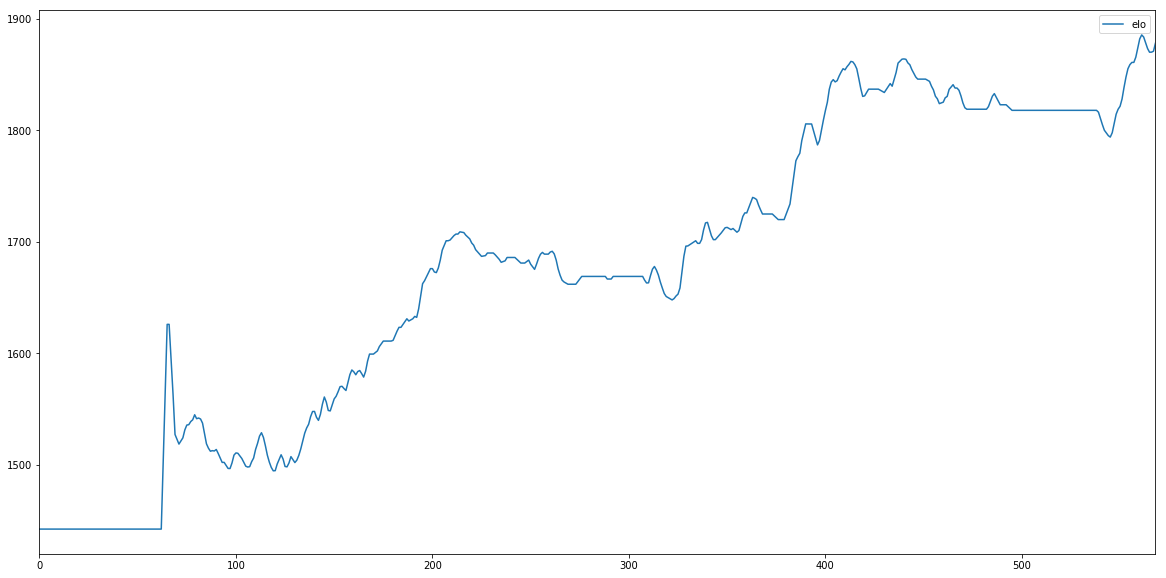

In [9]:
import pandas as pd
df = pd.read_csv("snapshot_krs289.csv")

df["PlayedOn"] = pd.to_datetime(df["PlayedOn"])

df = df.set_index("PlayedOn")

df = df[["elo"]]

df = df.resample("1D").mean().ffill().rolling(3).mean().dropna().reset_index()
df[["elo"]].plot(figsize=(20,10))

In [6]:
import pandas as pd 

df = pd.read_csv("snapshot_pinkelgelbezaehne.csv")

df["PlayedOn"] = pd.to_datetime(df["PlayedOn"])

df = df.set_index("PlayedOn")

df = df[["elo"]]

df = df.resample("1D").mean().ffill().rolling(3).mean().dropna().reset_index()

df.tail()

,PlayedOn,elo
945,2021-12-22,2089.142857
946,2021-12-23,2089.142857
947,2021-12-24,2089.142857
948,2021-12-25,2089.142857
949,2021-12-26,2084.913420


In [10]:
import pandas as pd

df = pd.read_csv("snapshot_tuxmania.csv")

min_date = "1900-01-01"
max_date = "2022-02-03"

df[["PlayedOn"]]


#df = df[(df["PlayedOn"] >= min_date) & (df["PlayedOn"] <= max_date)]

#y = df[["Year","Month","id"]].groupby(["Year","Month"]).count().reset_index()
#y["time"] = y.apply(lambda x: x["Year"].astype(str) + "-M" + ("0" if x["Month"] < 10 else "") +   x["Month"].astype(str),axis=1)
#y

import datetime 

datetime.datetime.strptime("2022-02-03","%Y-%m-%d")




ValueError: time data '2022-02-03' does not match format 'YYYY-MM-dd'